<a href="https://colab.research.google.com/github/fabriciosgouveia/Angular_agendacontados/blob/main/FabricioSebastiaoDeGouveia_ValidacaoModelosDeClusterizacao_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Validação de Modelos de Clusterização
## Análise de Municípios Brasileiros - Dados IBGE

**Disciplina**: Validação de Modelos de Clusterização  
**Pós-graduação em IA**

---

## Objetivos do Trabalho

1. Realizar análise exploratória de dados municipais brasileiros
2. Aplicar pré-processamento adequado aos dados
3. Implementar clusterização com **K-Médias** e **DBScan**
4. Validar resultados usando **índice de silhueta** e outras métricas
5. Comparar e interpretar os resultados obtidos

---

## Dataset

**Fonte**: Economy and Population of Cities in Brazil (IBGE)  
**Link**: https://www.kaggle.com/datasets/gabrielrs3/economy-and-population-of-cities-in-brazil-ibge

**Características**:
- 5.571 municípios brasileiros
- 14 variáveis (econômicas, demográficas e geográficas)
- Dados de PIB, População, IDH, Receitas e Despesas municipais


## 1. Configuração do Ambiente

### 1.1 Instalação de Bibliotecas Necessárias


In [15]:
# Instalar bibliotecas adicionais (se necessário)
!pip install -q openpyxl scikit-learn matplotlib seaborn pandas numpy

### 1.2 Importação de Bibliotecas

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

# Configurar tamanho padrão dos gráficos
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Clusterização
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Validação
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Redução de dimensionalidade para visualização
from sklearn.decomposition import PCA

# Utilidades
from scipy.spatial.distance import cdist

print(" Todas as bibliotecas importadas com sucesso!")
print(" Versão do pandas: {pd.__version__}")
print(" Versão do numpy: {np.__version__}")

 Todas as bibliotecas importadas com sucesso!
 Versão do pandas: {pd.__version__}
 Versão do numpy: {np.__version__}


## 2. Carregamento e Exploração Inicial dos Dados

### 2.1 Upload do Dataset

**Instruções**:
1. Baixe o dataset do Kaggle: https://www.kaggle.com/datasets/gabrielrs3/economy-and-population-of-cities-in-brazil-ibge
2. Faça upload do arquivo `Cities_Brazil_IBGE.xlsx` no Colab
3. Execute a célula abaixo


In [3]:
# Opção 1: Upload manual
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [6]:
# Carregar o dataset
try:
    df = pd.read_excel('Cities_Brazil_IBGE.xlsx', sheet_name='IBGE')
    print("✓ Dataset carregado com sucesso!")
    print(f"✓ Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
except Exception as e:
    print(f" Erro ao carregar: {e}")
    print("Verifique se o arquivo foi enviado corretamente")

✓ Dataset carregado com sucesso!
✓ Dimensões: 5570 linhas × 14 colunas


### 2.2 Visualização Inicial dos Dados

In [7]:
# Primeiras linhas do dataset
print("=" * 80)
print("PRIMEIRAS 10 LINHAS DO DATASET")
print("=" * 80)
df.head(10)

PRIMEIRAS 10 LINHAS DO DATASET


,IBGECode,LocalCidade,LocalUF,LocalEstado,RegiaoBrasil,Latitude,Longitude,Gentilico,PopEstimada_2018,PopCenso 2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014
0,1100015,ALTA FLORESTA D'OESTE,RO,Rondonia,N,-119283,-619953,alta-florense,23167,24392,"0,641",53490,47577,"16461,11"
1,1100023,ARIQUEMES,RO,Rondonia,N,-990571,-630325,ariquemense,106168,90353,"0,702",0,0,"19401,43"
2,1100031,CABIXI,RO,Rondonia,N,-134945,-60552,cabixiense,5438,6313,"0,65",22635,19354,"18346,17"
3,1100049,CACOAL,RO,Rondonia,N,-114343,-614562,cacoalense,84813,78574,"0,718",169636,155473,"20725,23"
4,1100056,CEREJEIRAS,RO,Rondonia,N,-13187,-608168,cerejeirense,16444,17029,"0,692",53147,46774,"22179,17"
5,1100064,COLORADO D OESTE,RO,Rondonia,N,-131174,-605454,coloradense,16227,18591,"0,685",34612,34381,"15300,88"
6,1100072,CORUMBIARA,RO,Rondonia,N,-129551,-608947,corumbiarense,7567,8783,"0,613",31930,26576,"21651,45"
7,1100080,COSTA MARQUES,RO,Rondonia,N,-124367,-64228,costa-marquense,17855,13678,"0,611",0,0,"11221,33"
8,1100098,ESPIGAO D OESTE,RO,Rondonia,N,-115266,-610252,espigãoense,32047,28729,"0,672",64926,48201,"14870,87"
9,1100106,GUAJARA MIRIM,RO,Rondonia,N,-107889,-653296,guajará-mirense,45783,41656,"0,657",76112,68052,"14711,46"


In [8]:
# Informações sobre o dataset
print("=" * 80)
print("INFORMAÇÕES DO DATASET")
print("=" * 80)
df.info()

INFORMAÇÕES DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   IBGECode                 5570 non-null   int64 
 1   LocalCidade              5570 non-null   object
 2   LocalUF                  5570 non-null   object
 3   LocalEstado              5570 non-null   object
 4   RegiaoBrasil             5570 non-null   object
 5   Latitude                 5570 non-null   object
 6   Longitude                5570 non-null   object
 7   Gentilico                5570 non-null   object
 8   PopEstimada_2018         5570 non-null   int64 
 9   PopCenso 2010            5570 non-null   int64 
 10  IDHM                     5564 non-null   object
 11  ReceitasRealizadas_2014  5570 non-null   int64 
 12  DespesasEmpenhadas_2014  5570 non-null   int64 
 13  Pib_2014                 5570 non-null   object
dtypes: int64(5), obje

In [9]:
# Estatísticas descritivas
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS")
print("=" * 80)
df.describe().T

ESTATÍSTICAS DESCRITIVAS


,count,mean,std,min,25%,50%,75%,max
IBGECode,5570.0,3.253591e+06,984910.339431,1100015.0,2512125.75,3146280.0,4119189.50,5300108.0
PopEstimada_2018,5570.0,3.743176e+04,219968.997350,786.0,5454.00,11590.5,25295.50,12176866.0
PopCenso 2010,5570.0,3.424555e+04,203024.233205,0.0,5220.00,10931.5,23409.00,11253503.0
ReceitasRealizadas_2014,5570.0,8.922484e+04,781639.124902,0.0,13193.00,22234.5,47831.75,43356091.0
DespesasEmpenhadas_2014,5570.0,8.367268e+04,767557.578263,0.0,11665.25,20249.5,44518.50,43443326.0


In [11]:
# Verificar valores faltantes
print("=" * 80)
print("VALORES FALTANTES")
print("=" * 80)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Coluna': missing.index,
    'Valores Faltantes': missing.values,
    'Percentual (%)': missing_pct.values
})
display(missing_df[missing_df['Valores Faltantes'] > 0])

if missing.sum() == 0:
    print("\n Não há valores faltantes no dataset!")
else:
    print(f"\n Total de valores faltantes: {missing.sum()}")

VALORES FALTANTES


,Coluna,Valores Faltantes,Percentual (%)
10,IDHM,6,0.10772



 Total de valores faltantes: 6


## 3. Análise Exploratória de Dados (EDA)

### 3.1 Distribuição das Variáveis Numéricas


TypeError: 'value' must be an instance of str or bytes, not a int

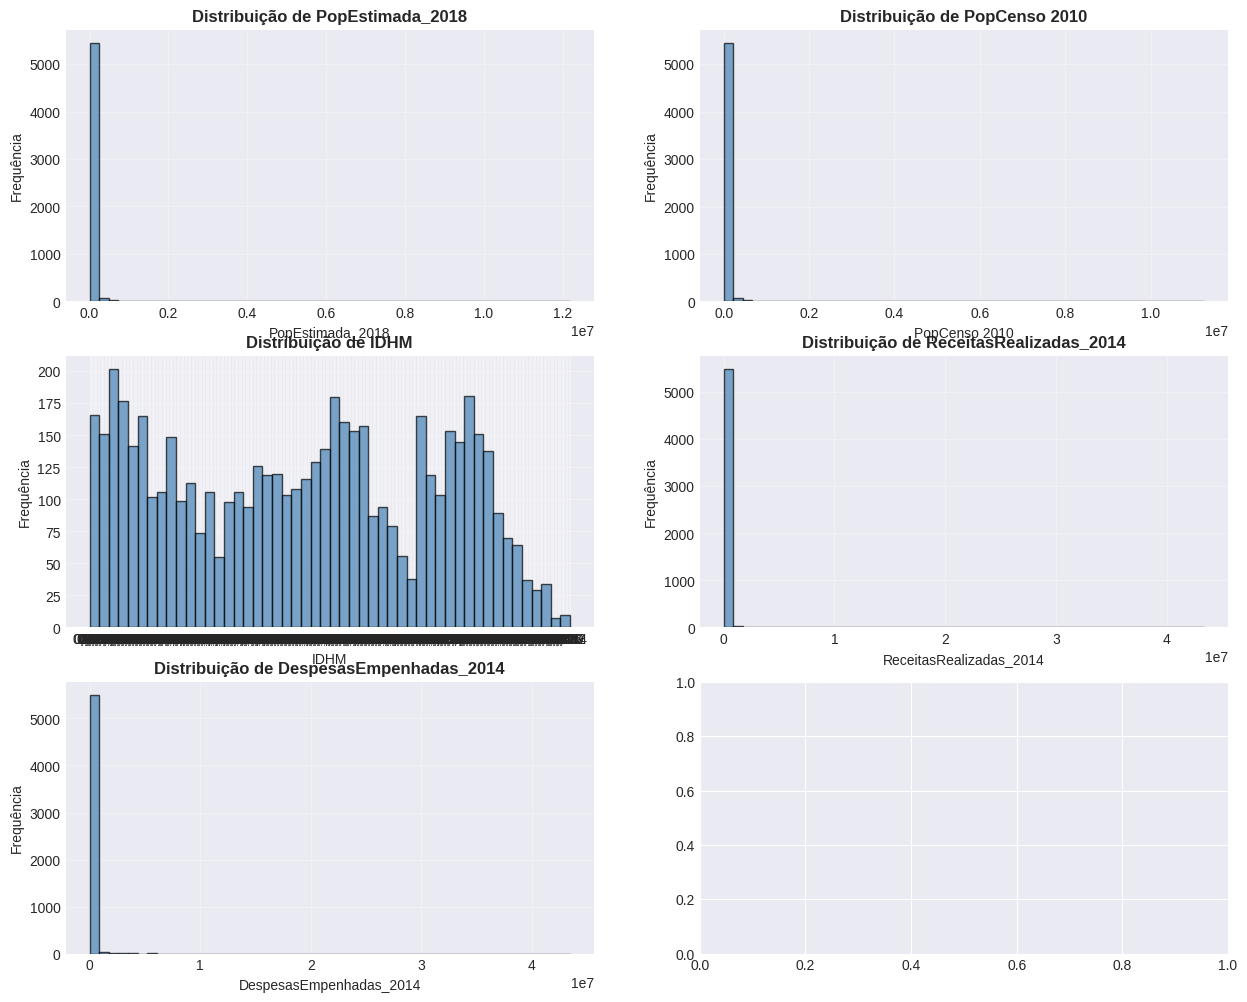

In [12]:
# Selecionar apenas colunas numéricas para análise
numeric_cols = ['PopEstimada_2018', 'PopCenso 2010', 'IDHM',
                'ReceitasRealizadas_2014', 'DespesasEmpenhadas_2014', 'Pib_2014']

# Criar figura com subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'Distribuição de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequência')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.2 Análise de Outliers com Boxplots

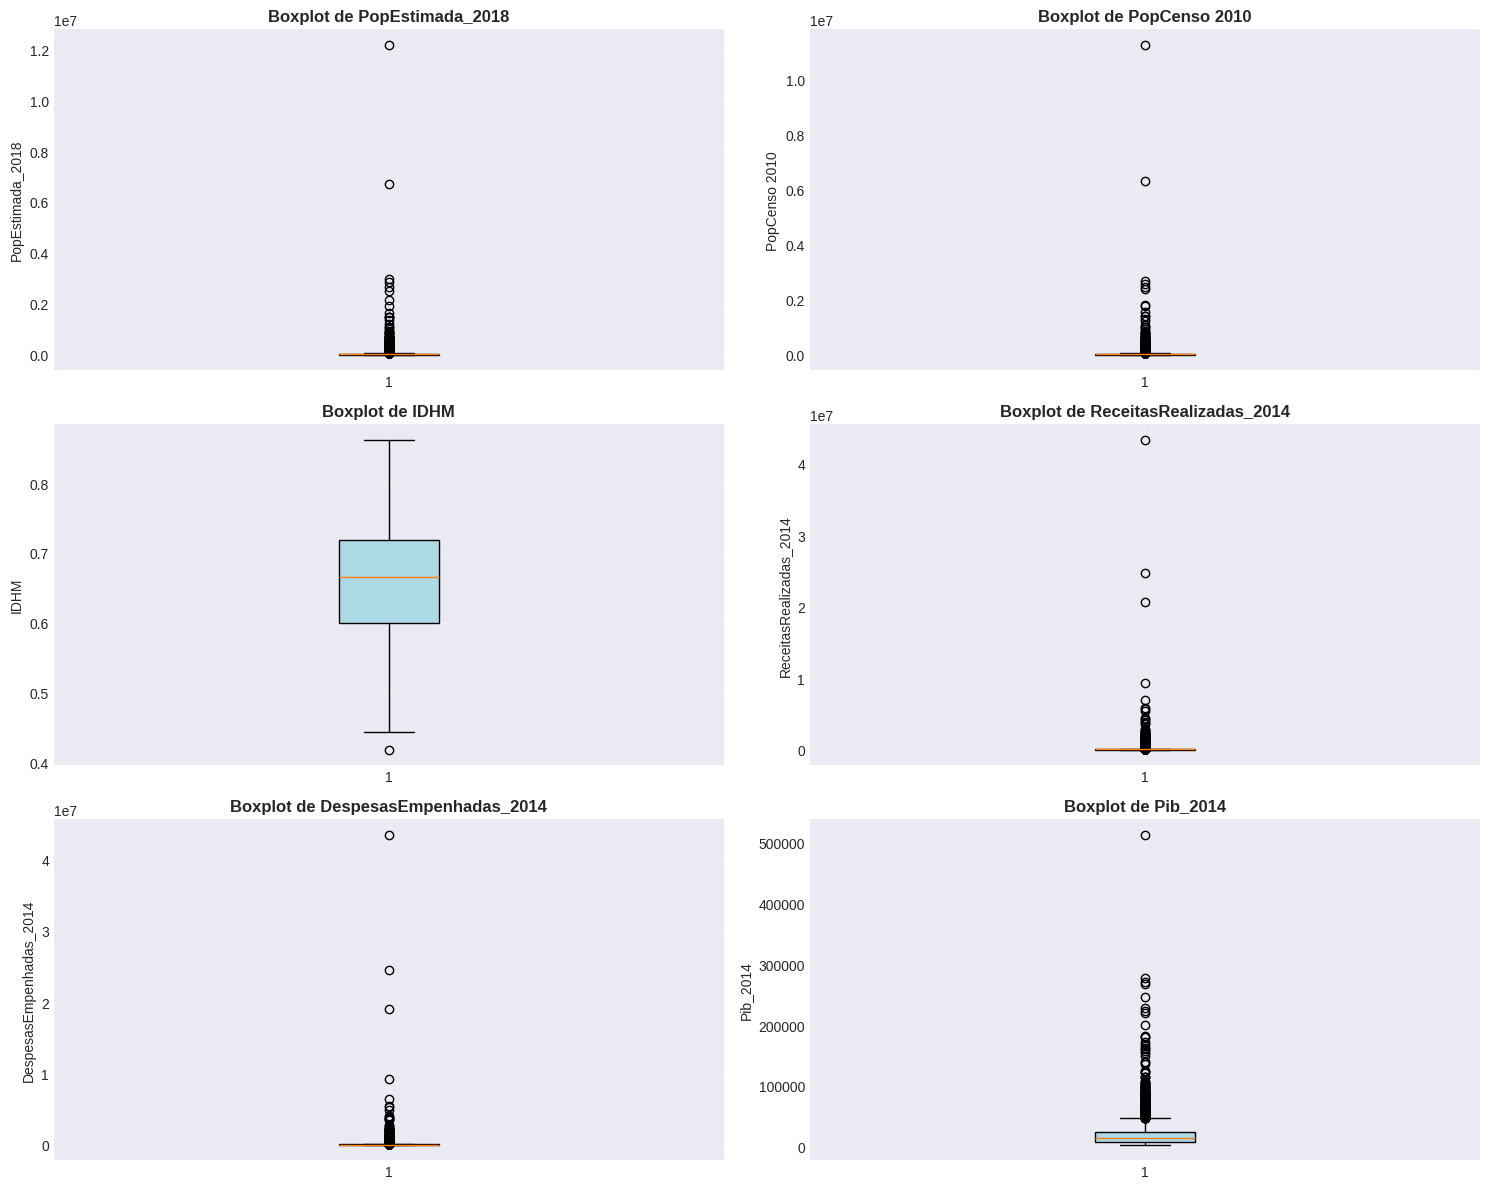

 Observação: Presença significativa de outliers (municípios muito grandes)


In [15]:
# Boxplots para identificar outliers

# Garante que as colunas 'IDHM' e 'Pib_2014' sejam numéricas,
# pois elas são identificadas como 'object' (string) com vírgulas como separador decimal.
# Este é um pré-requisito para operações numéricas como o boxplot.
# O dataset foi carregado com essas colunas como string, e a conversão com replace e astype(float)
# é necessária antes da análise estatística.

df['IDHM'] = df['IDHM'].str.replace(',', '.', regex=False).astype(float)
df['Pib_2014'] = df['Pib_2014'].str.replace(',', '.', regex=False).astype(float)

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue'))
    axes[idx].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Observação: Presença significativa de outliers (municípios muito grandes)")

### 3.3 Matriz de Correlação

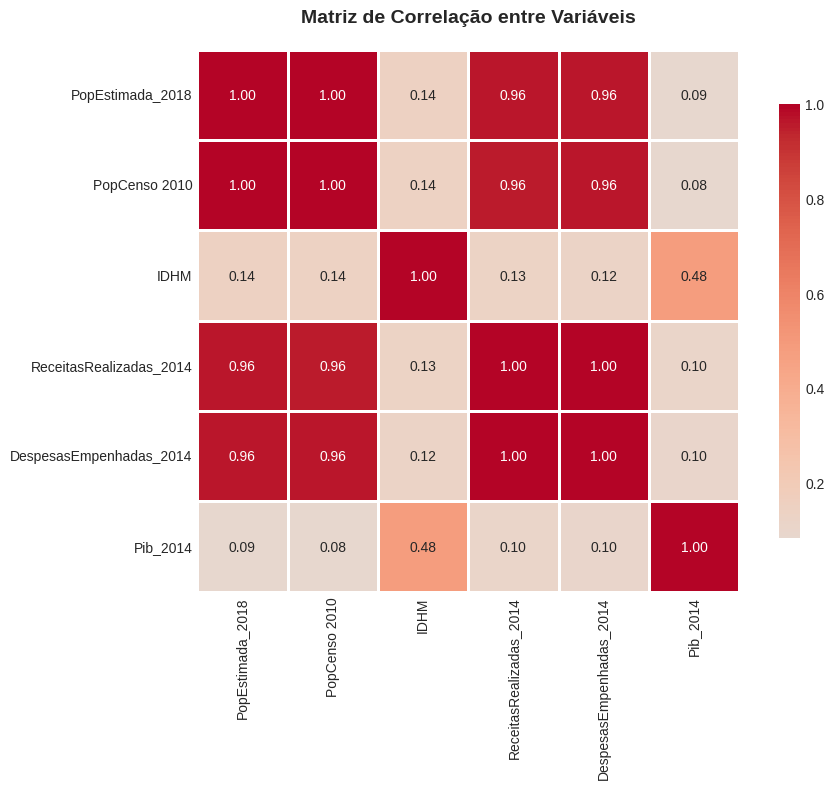


Correlações mais fortes:


PopEstimada_2018         PopCenso 2010              0.999608
ReceitasRealizadas_2014  DespesasEmpenhadas_2014    0.998160
DespesasEmpenhadas_2014  PopEstimada_2018           0.964267
PopCenso 2010            DespesasEmpenhadas_2014    0.963810
ReceitasRealizadas_2014  PopEstimada_2018           0.960795
                         PopCenso 2010              0.959776
Pib_2014                 IDHM                       0.482207
PopEstimada_2018         IDHM                       0.142396
IDHM                     PopCenso 2010              0.138951
ReceitasRealizadas_2014  IDHM                       0.128405
dtype: float64

In [19]:
# Calcular matriz de correlação

# -------------------------------------------------------------------------------------

correlation_matrix = df[numeric_cols].corr()

# Visualizar matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação entre Variáveis', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelações mais fortes:")
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1.0]  # Remover autocorrelações
display(corr_pairs.drop_duplicates().head(10))

### 3.4 Distribuição Geográfica

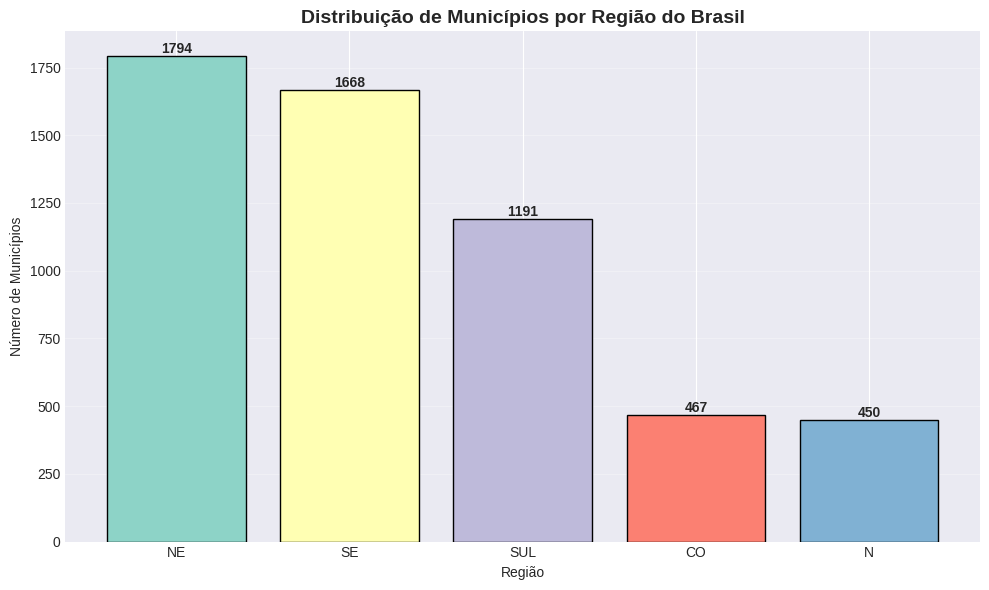

In [20]:
# Distribuição de municípios por região
plt.figure(figsize=(10, 6))
region_counts = df['RegiaoBrasil'].value_counts()
colors = plt.cm.Set3(range(len(region_counts)))
bars = plt.bar(region_counts.index, region_counts.values, color=colors, edgecolor='black')
plt.title('Distribuição de Municípios por Região do Brasil', fontsize=14, fontweight='bold')
plt.xlabel('Região')
plt.ylabel('Número de Municípios')
plt.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 3.5 Análise da Faixa Dinâmica das Variáveis

In [21]:
# Análise da faixa dinâmica
print("=" * 80)
print("ANÁLISE DA FAIXA DINÂMICA DAS VARIÁVEIS")
print("=" * 80)

faixa_data = []
for col in numeric_cols:
    data = df[col].dropna()
    faixa_data.append({
        'Variável': col,
        'Mínimo': f"{data.min():,.2f}",
        'Máximo': f"{data.max():,.2f}",
        'Amplitude': f"{data.max() - data.min():,.2f}",
        'Média': f"{data.mean():,.2f}",
        'Mediana': f"{data.median():,.2f}",
        'Desvio Padrão': f"{data.std():,.2f}",
        'CV (%)': f"{(data.std() / data.mean()) * 100:.2f}"
    })

faixa_df = pd.DataFrame(faixa_data)
display(faixa_df)

print("\n" + "=" * 80)
print("CONCLUSÃO:")
print("=" * 80)
print("✓ As variáveis apresentam escalas muito diferentes")
print("✓ Presença de alta variabilidade (outliers)")
print("✓ NECESSÁRIO: Normalização/Padronização antes da clusterização")

ANÁLISE DA FAIXA DINÂMICA DAS VARIÁVEIS


,Variável,Mínimo,Máximo,Amplitude,Média,Mediana,Desvio Padrão,CV (%)
0,PopEstimada_2018,786.00,"12,176,866.00","12,176,080.00","37,431.76","11,590.50","219,969.00",587.65
1,PopCenso 2010,0.00,"11,253,503.00","11,253,503.00","34,245.55","10,931.50","203,024.23",592.85
2,IDHM,0.42,0.86,0.44,0.66,0.67,0.07,10.92
3,ReceitasRealizadas_2014,0.00,"43,356,091.00","43,356,091.00","89,224.84","22,234.50","781,639.12",876.03
4,DespesasEmpenhadas_2014,0.00,"43,443,326.00","43,443,326.00","83,672.68","20,249.50","767,557.58",917.33
5,Pib_2014,"3,369.79","513,134.20","509,764.41","19,476.71","14,676.84","19,506.67",100.15



CONCLUSÃO:
✓ As variáveis apresentam escalas muito diferentes
✓ Presença de alta variabilidade (outliers)
✓ NECESSÁRIO: Normalização/Padronização antes da clusterização


## 4. Pré-processamento dos Dados

### 4.1 Seleção de Features para Clusterização

Vamos selecionar as variáveis mais relevantes para a clusterização:
- **PopEstimada_2018**: População estimada
- **IDHM**: Índice de Desenvolvimento Humano Municipal
- **Pib_2014**: PIB municipal
- **ReceitasRealizadas_2014**: Receitas municipais
- **DespesasEmpenhadas_2014**: Despesas municipais


In [22]:
# Selecionar features para clusterização
features_clustering = ['PopEstimada_2018', 'IDHM', 'Pib_2014',
                       'ReceitasRealizadas_2014', 'DespesasEmpenhadas_2014']

# Criar dataframe apenas com features selecionadas
df_clustering = df[features_clustering].copy()

# Remover linhas com valores faltantes (se houver)
df_clustering = df_clustering.dropna()

print(f"✓ Features selecionadas: {len(features_clustering)}")
print(f"✓ Número de municípios para análise: {len(df_clustering)}")
print(f"\nFeatures: {features_clustering}")

✓ Features selecionadas: 5
✓ Número de municípios para análise: 5511

Features: ['PopEstimada_2018', 'IDHM', 'Pib_2014', 'ReceitasRealizadas_2014', 'DespesasEmpenhadas_2014']


### 4.2 Normalização dos Dados

Como as variáveis têm escalas muito diferentes, é essencial normalizá-las usando **StandardScaler** (z-score normalization).


In [23]:
# Normalizar os dados usando StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_clustering)

# Converter de volta para DataFrame para facilitar visualização
df_normalized = pd.DataFrame(df_normalized, columns=features_clustering,
                              index=df_clustering.index)

print("✓ Dados normalizados com sucesso!")
print("\nEstatísticas após normalização (deve ter média ~0 e desvio padrão ~1):")
display(df_normalized.describe().T)

✓ Dados normalizados com sucesso!

Estatísticas após normalização (deve ter média ~0 e desvio padrão ~1):


,count,mean,std,min,25%,50%,75%,max
PopEstimada_2018,5511.0,-7.735903e-18,1.000091,-0.166159,-0.145040,-0.117298,-0.055464,54.914337
IDHM,5511.0,3.713234e-16,1.000091,-3.347674,-0.835094,0.081096,0.816824,2.815783
Pib_2014,5511.0,-1.237745e-16,1.000091,-0.826000,-0.567863,-0.246095,0.231145,25.326417
ReceitasRealizadas_2014,5511.0,-2.578634e-18,1.000091,-0.113993,-0.097180,-0.085686,-0.053193,55.071736
DespesasEmpenhadas_2014,5511.0,-1.031454e-17,1.000091,-0.108841,-0.093672,-0.082590,-0.051240,56.201213


### 4.3 Visualização dos Dados Normalizados

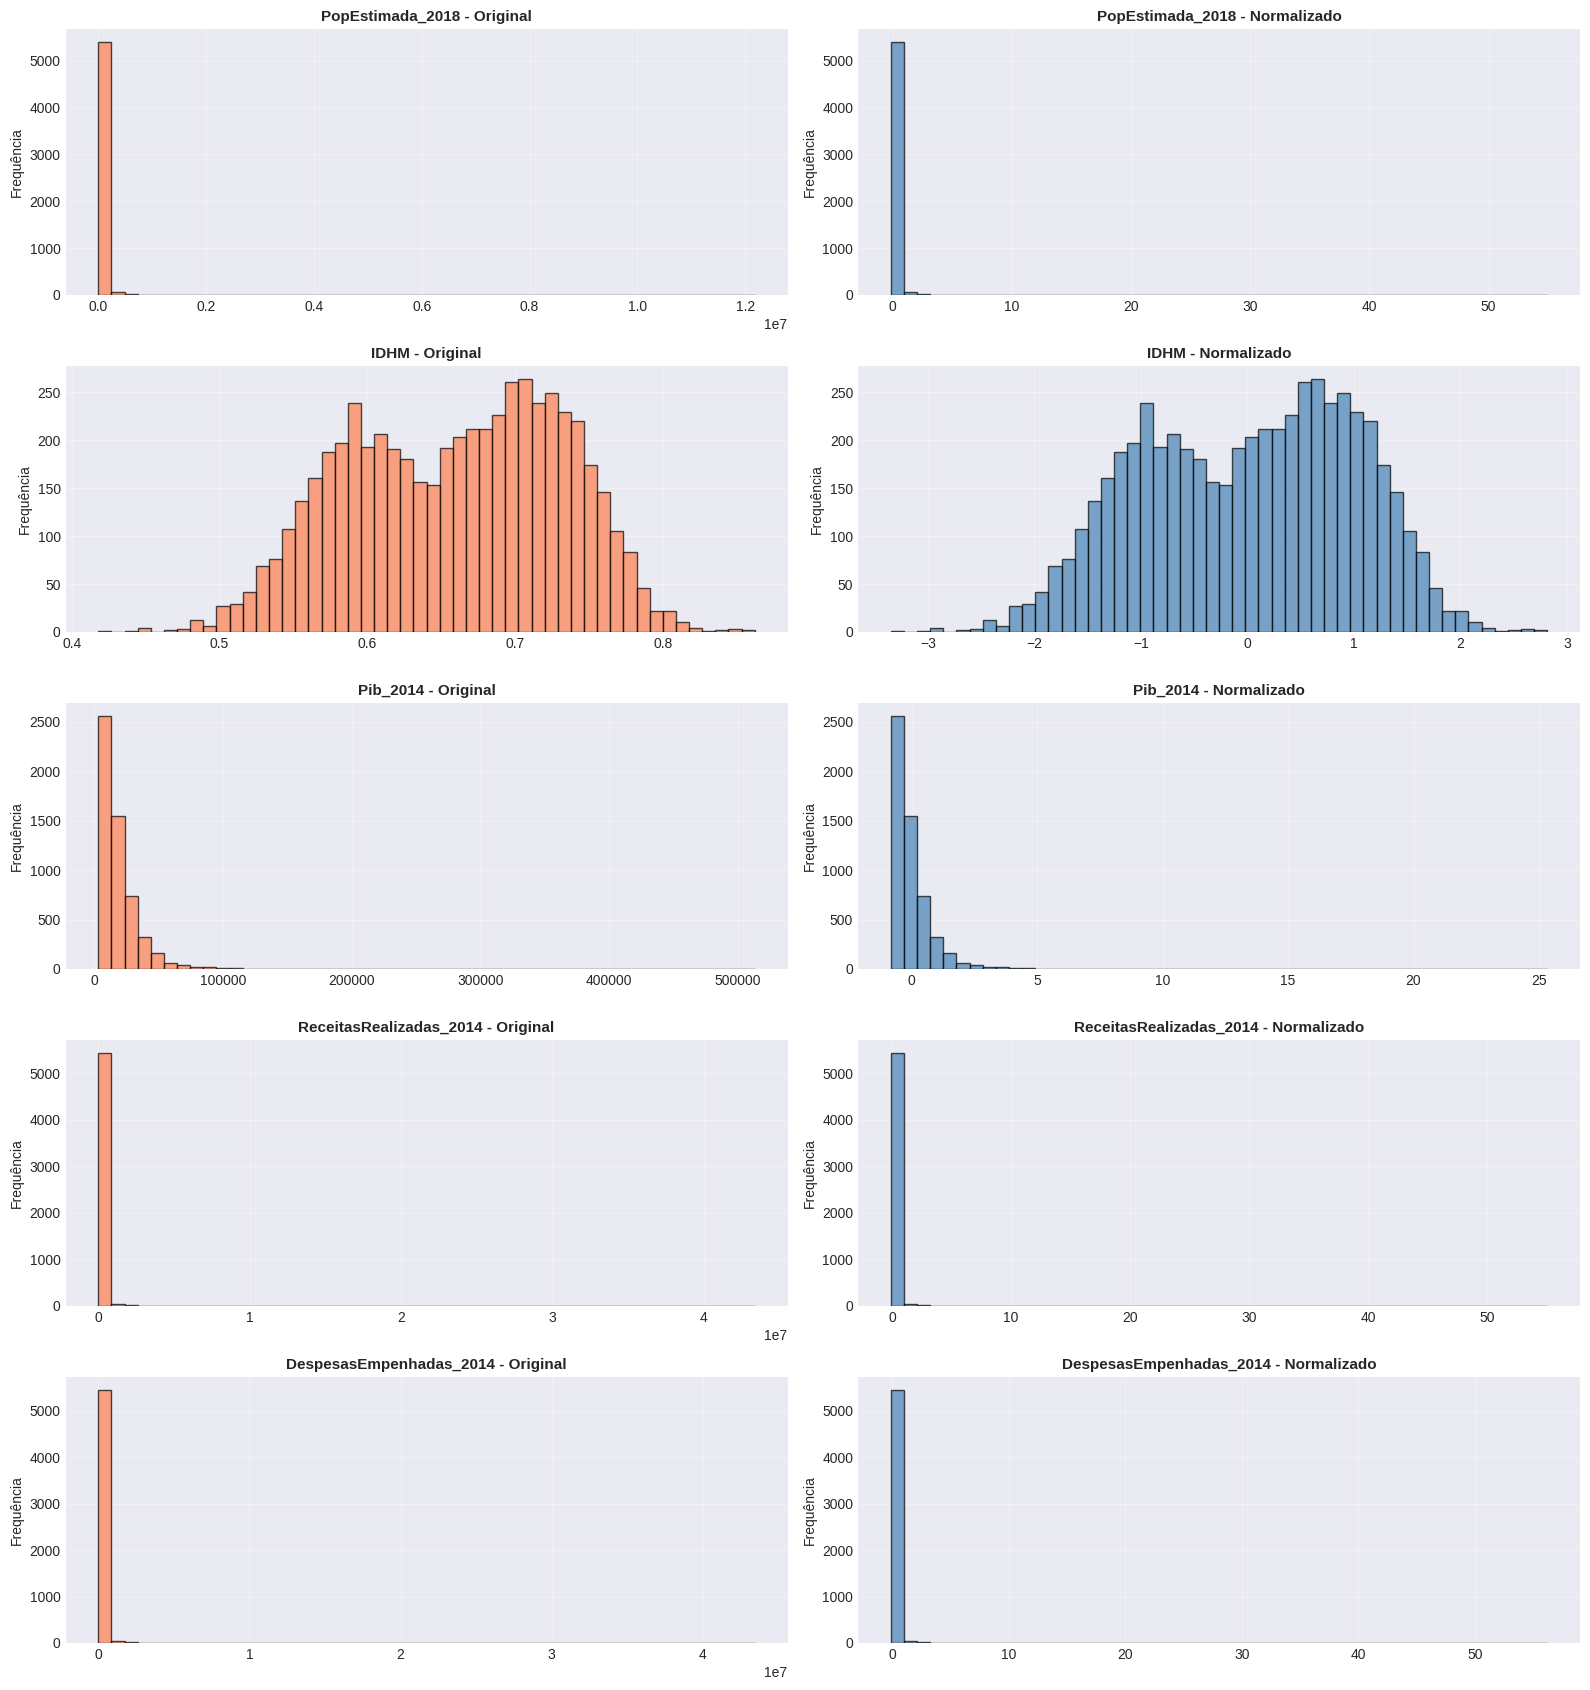

✓ Comparação visual concluída: dados originais vs normalizados


In [24]:
# Comparar distribuições antes e depois da normalização
fig, axes = plt.subplots(len(features_clustering), 2, figsize=(16, 17))

for idx, col in enumerate(features_clustering):
    # Antes da normalização
    axes[idx, 0].hist(df_clustering[col], bins=50, edgecolor='black',
                      alpha=0.7, color='coral')
    axes[idx, 0].set_title(f'{col} - Original', fontsize=11, fontweight='bold')
    axes[idx, 0].set_ylabel('Frequência')
    axes[idx, 0].grid(True, alpha=0.3)

    # Depois da normalização
    axes[idx, 1].hist(df_normalized[col], bins=50, edgecolor='black',
                      alpha=0.7, color='steelblue')
    axes[idx, 1].set_title(f'{col} - Normalizado', fontsize=11, fontweight='bold')
    axes[idx, 1].set_ylabel('Frequência')
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Comparação visual concluída: dados originais vs normalizados")

## 5. Clusterização com K-Médias

### 5.1 Método do Cotovelo (Elbow Method)

Vamos determinar o número ótimo de clusters usando o método do cotovelo.


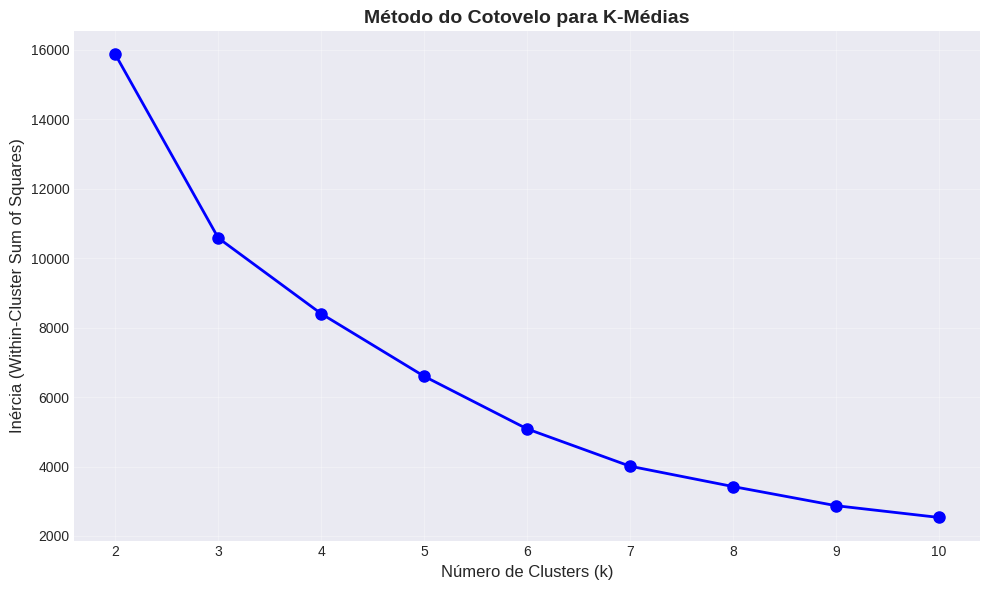

✓ Método do cotovelo concluído
📊 Analise o gráfico para identificar o 'cotovelo' (ponto de inflexão)


In [25]:
# Método do cotovelo
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_normalized)
    inertias.append(kmeans.inertia_)

# Plotar método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inércia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Método do Cotovelo para K-Médias', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

print("Método do cotovelo concluído")
print("Analise o gráfico para identificar o 'cotovelo' (ponto de inflexão)")

### 5.2 Índice de Silhueta para K-Médias

Vamos calcular o índice de silhueta para diferentes valores de k.


k=2: Silhueta = 0.9730
k=3: Silhueta = 0.4776
k=4: Silhueta = 0.5084
k=5: Silhueta = 0.5084
k=6: Silhueta = 0.5141
k=7: Silhueta = 0.4738
k=8: Silhueta = 0.4025
k=9: Silhueta = 0.4134
k=10: Silhueta = 0.3899


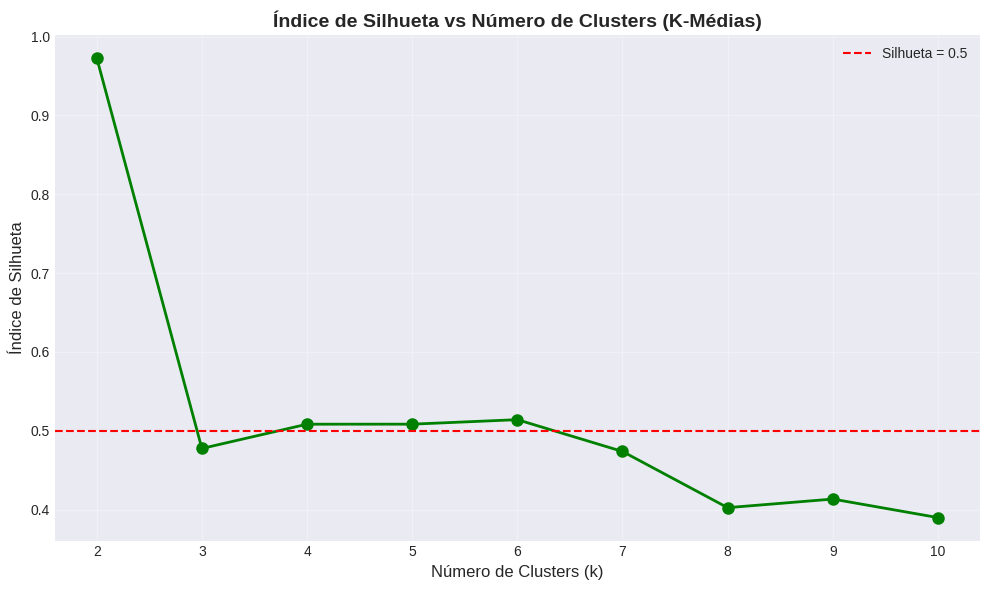


✓ Melhor k para K-Médias: 2
✓ Melhor índice de silhueta: 0.9730


In [26]:
# Calcular índice de silhueta para diferentes k
silhouette_scores_kmeans = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_normalized)
    score = silhouette_score(df_normalized, labels)
    silhouette_scores_kmeans.append(score)
    print(f"k={k}: Silhueta = {score:.4f}")

# Plotar índice de silhueta
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores_kmeans, 'go-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Índice de Silhueta', fontsize=12)
plt.title('Índice de Silhueta vs Número de Clusters (K-Médias)',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.axhline(y=0.5, color='r', linestyle='--', label='Silhueta = 0.5')
plt.legend()
plt.tight_layout()
plt.show()

# Encontrar k ótimo
best_k_kmeans = K_range[np.argmax(silhouette_scores_kmeans)]
best_silhouette_kmeans = max(silhouette_scores_kmeans)
print(f"\n✓ Melhor k para K-Médias: {best_k_kmeans}")
print(f"✓ Melhor índice de silhueta: {best_silhouette_kmeans:.4f}")

### 5.3 Aplicar K-Médias com k Ótimo

In [27]:
# Aplicar K-Médias com k ótimo
kmeans_final = KMeans(n_clusters=best_k_kmeans, random_state=42, n_init=10)
labels_kmeans = kmeans_final.fit_predict(df_normalized)

# Adicionar labels ao dataframe original
df_result_kmeans = df_clustering.copy()
df_result_kmeans['Cluster_KMeans'] = labels_kmeans

print(f"✓ K-Médias aplicado com k={best_k_kmeans}")
print(f"\nDistribuição de municípios por cluster:")
print(df_result_kmeans['Cluster_KMeans'].value_counts().sort_index())

✓ K-Médias aplicado com k=2

Distribuição de municípios por cluster:
Cluster_KMeans
0    5508
1       3
Name: count, dtype: int64


### 5.4 Visualização dos Clusters (K-Médias) com PCA

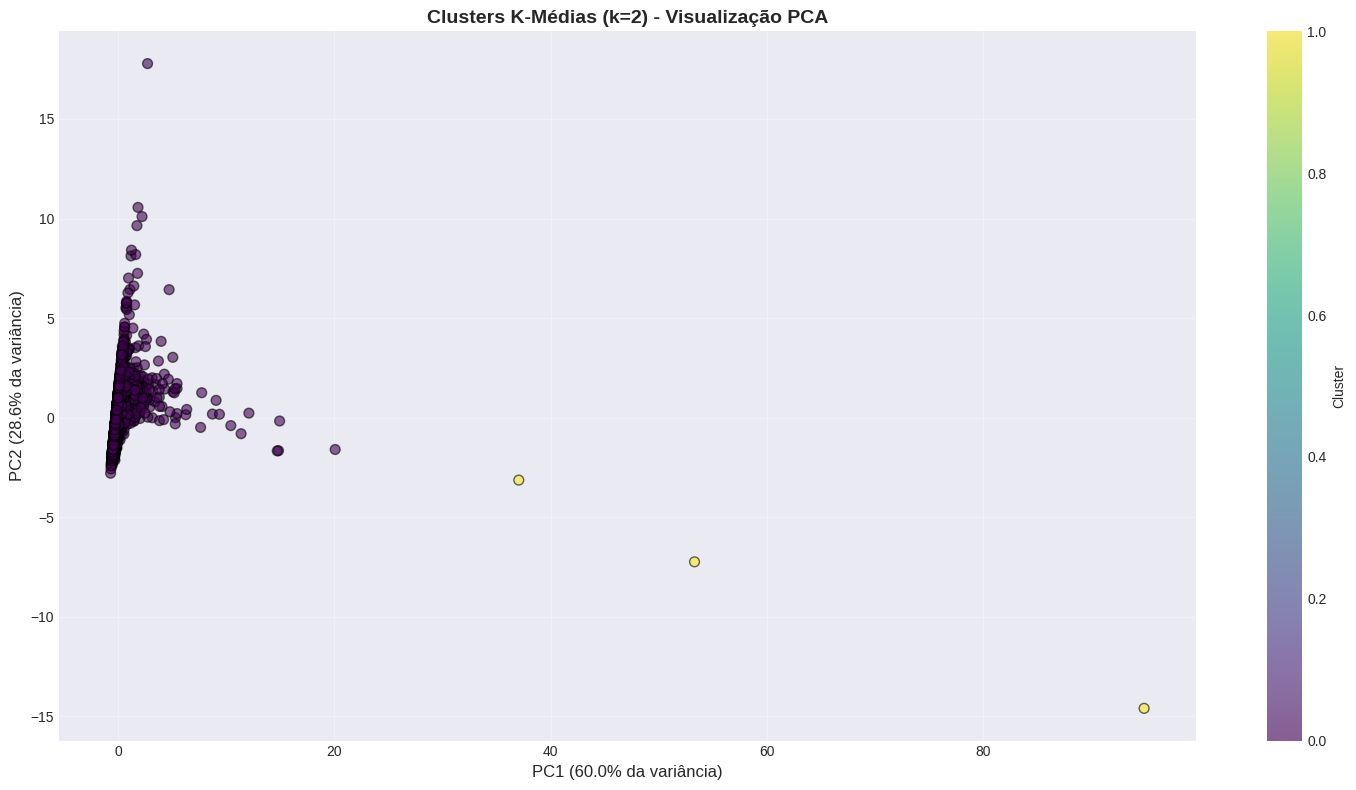

✓ Variância explicada pelos 2 primeiros componentes: 88.64%


In [29]:
# Reduzir dimensionalidade para 2D usando PCA
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_normalized)

# Plotar clusters
plt.figure(figsize=(15, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_kmeans,
                     cmap='viridis', s=50, alpha=0.6, edgecolors='black')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% da variância)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% da variância)', fontsize=12)
plt.title(f'Clusters K-Médias (k={best_k_kmeans}) - Visualização PCA',
          fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✓ Variância explicada pelos 2 primeiros componentes: "
      f"{sum(pca.explained_variance_ratio_)*100:.2f}%")

### 5.5 Caracterização dos Clusters (K-Médias)

CARACTERIZAÇÃO DOS CLUSTERS - K-MÉDIAS


,PopEstimada_2018,IDHM,Pib_2014,ReceitasRealizadas_2014,DespesasEmpenhadas_2014
Cluster_KMeans,,,,,
0,3.357217e+04,0.659076,19448.542511,7.350671e+04,6.822484e+04
1,7.280165e+06,0.809333,59285.613333,2.955827e+07,2.899461e+07


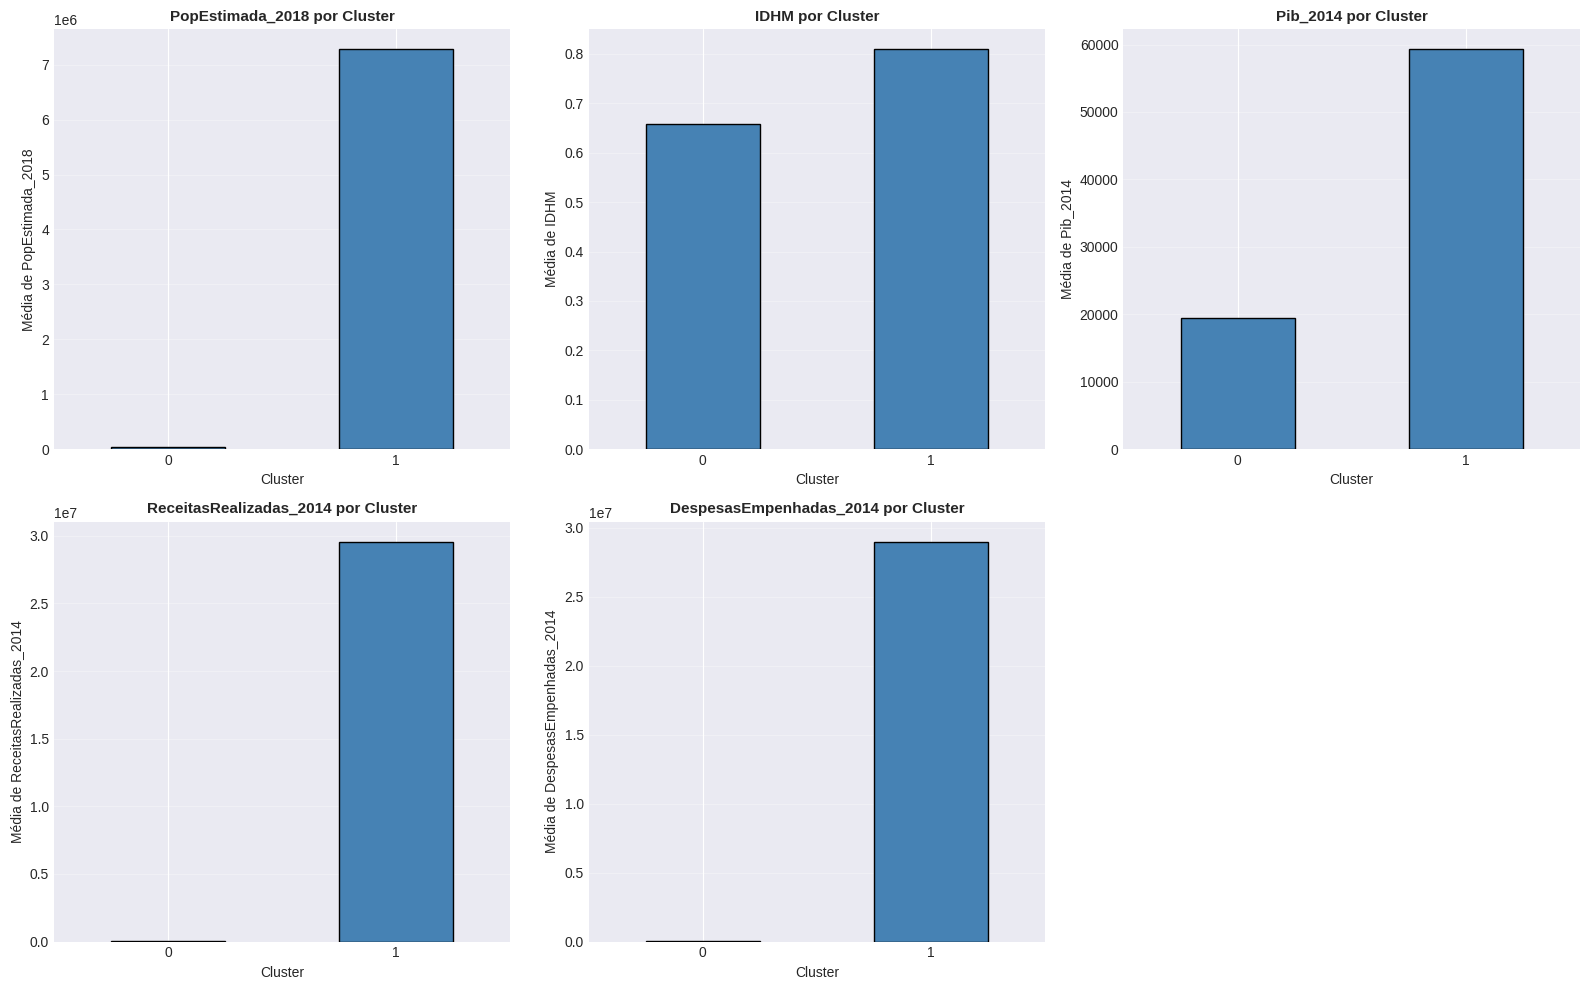


✓ Caracterização dos clusters concluída


In [30]:
# Calcular médias por cluster
cluster_means_kmeans = df_result_kmeans.groupby('Cluster_KMeans')[features_clustering].mean()

print("=" * 80)
print("CARACTERIZAÇÃO DOS CLUSTERS - K-MÉDIAS")
print("=" * 80)
display(cluster_means_kmeans)

# Visualizar características dos clusters
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(features_clustering):
    cluster_means_kmeans[col].plot(kind='bar', ax=axes[idx], color='steelblue',
                                    edgecolor='black')
    axes[idx].set_title(f'{col} por Cluster', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel(f'Média de {col}')
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].tick_params(axis='x', rotation=0)

# Remover subplot extra
axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("\n Caracterização dos clusters concluída")

## 6. Clusterização com DBScan

### 6.1 Determinação dos Parâmetros (eps e min_samples)

Para DBScan, precisamos determinar dois parâmetros:
- **eps**: raio máximo da vizinhança
- **min_samples**: número mínimo de pontos para formar um cluster


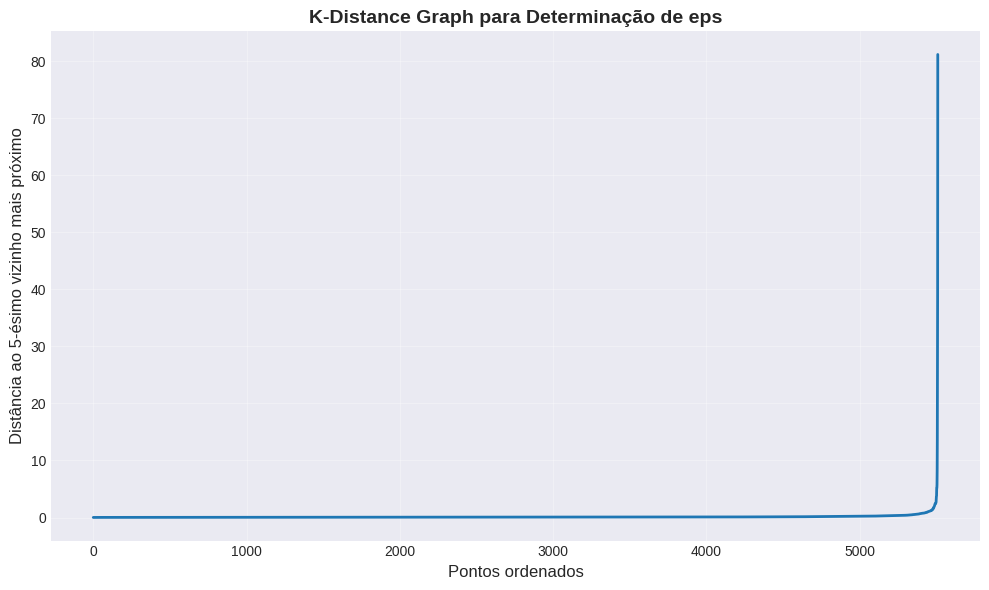

 Analise o gráfico para identificar o 'cotovelo' e escolher eps
 Dica: eps deve ser escolhido no ponto de maior curvatura


In [31]:
# Calcular distâncias k-nearest neighbors para determinar eps
from sklearn.neighbors import NearestNeighbors

k = 5  # min_samples típico
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(df_normalized)
distances, indices = neighbors.kneighbors(df_normalized)

# Ordenar distâncias
distances = np.sort(distances[:, k-1], axis=0)

# Plotar k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances, linewidth=2)
plt.xlabel('Pontos ordenados', fontsize=12)
plt.ylabel(f'Distância ao {k}-ésimo vizinho mais próximo', fontsize=12)
plt.title('K-Distance Graph para Determinação de eps', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(" Analise o gráfico para identificar o 'cotovelo' e escolher eps")
print(" Dica: eps deve ser escolhido no ponto de maior curvatura")

### 6.2 Testar Diferentes Valores de eps e min_samples

In [32]:
# Testar diferentes combinações de parâmetros
eps_values = [0.5, 0.7, 1.0]
min_samples_values = [5, 10, 15]

results_dbscan = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_normalized)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Calcular silhueta apenas se houver pelo menos 2 clusters
        if n_clusters >= 2:
            # Excluir ruído do cálculo da silhueta
            mask = labels != -1
            if sum(mask) > 0:
                silhouette = silhouette_score(df_normalized[mask], labels[mask])
            else:
                silhouette = -1
        else:
            silhouette = -1

        results_dbscan.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_pct': (n_noise / len(labels)) * 100,
            'silhouette': silhouette
        })

# Mostrar resultados
results_dbscan_df = pd.DataFrame(results_dbscan)
print("=" * 80)
print("RESULTADOS DOS TESTES COM DBSCAN")
print("=" * 80)
display(results_dbscan_df)

# Encontrar melhor configuração (maior silhueta, excluindo -1)
valid_results = results_dbscan_df[results_dbscan_df['silhouette'] > 0]
if len(valid_results) > 0:
    best_idx = valid_results['silhouette'].idxmax()
    best_params = results_dbscan_df.loc[best_idx]
    print(f"\n✓ Melhor configuração:")
    print(f"  eps = {best_params['eps']}")
    print(f"  min_samples = {best_params['min_samples']}")
    print(f"  Silhueta = {best_params['silhouette']:.4f}")
    print(f"  Clusters = {best_params['n_clusters']}")
    print(f"  Ruído = {best_params['n_noise']} ({best_params['noise_pct']:.2f}%)")
else:
    print("\n Nenhuma configuração válida encontrada. Ajuste os parâmetros.")

RESULTADOS DOS TESTES COM DBSCAN


,eps,min_samples,n_clusters,n_noise,noise_pct,silhouette
0,0.5,5,1,131,2.377064,-1.000000
1,0.5,10,1,154,2.794411,-1.000000
2,0.5,15,2,188,3.411359,0.604733
3,0.7,5,1,89,1.614952,-1.000000
4,0.7,10,1,102,1.850844,-1.000000
5,0.7,15,1,118,2.141172,-1.000000
6,1.0,5,1,48,0.870985,-1.000000
7,1.0,10,1,70,1.270187,-1.000000
8,1.0,15,1,76,1.379060,-1.000000



✓ Melhor configuração:
  eps = 0.5
  min_samples = 15.0
  Silhueta = 0.6047
  Clusters = 2.0
  Ruído = 188.0 (3.41%)


### 6.3 Aplicar DBScan com Parâmetros Ótimos

In [33]:
# Aplicar DBScan com melhores parâmetros
if len(valid_results) > 0:
    best_eps = best_params['eps']
    best_min_samples = int(best_params['min_samples'])

    dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    labels_dbscan = dbscan_final.fit_predict(df_normalized)

    # Adicionar labels ao dataframe
    df_result_dbscan = df_clustering.copy()
    df_result_dbscan['Cluster_DBScan'] = labels_dbscan

    print(f"✓ DBScan aplicado com eps={best_eps}, min_samples={best_min_samples}")
    print(f"\nDistribuição de municípios por cluster:")
    print(df_result_dbscan['Cluster_DBScan'].value_counts().sort_index())
    print(f"\n⚠ Cluster -1 representa RUÍDO (outliers)")
else:
    print("⚠ Configure manualmente os parâmetros do DBScan")
    # Usar valores padrão
    dbscan_final = DBSCAN(eps=1.0, min_samples=5)
    labels_dbscan = dbscan_final.fit_predict(df_normalized)
    df_result_dbscan = df_clustering.copy()
    df_result_dbscan['Cluster_DBScan'] = labels_dbscan

✓ DBScan aplicado com eps=0.5, min_samples=15

Distribuição de municípios por cluster:
Cluster_DBScan
-1     188
 0    5310
 1      13
Name: count, dtype: int64

⚠ Cluster -1 representa RUÍDO (outliers)


### 6.4 Visualização dos Clusters (DBScan) com PCA

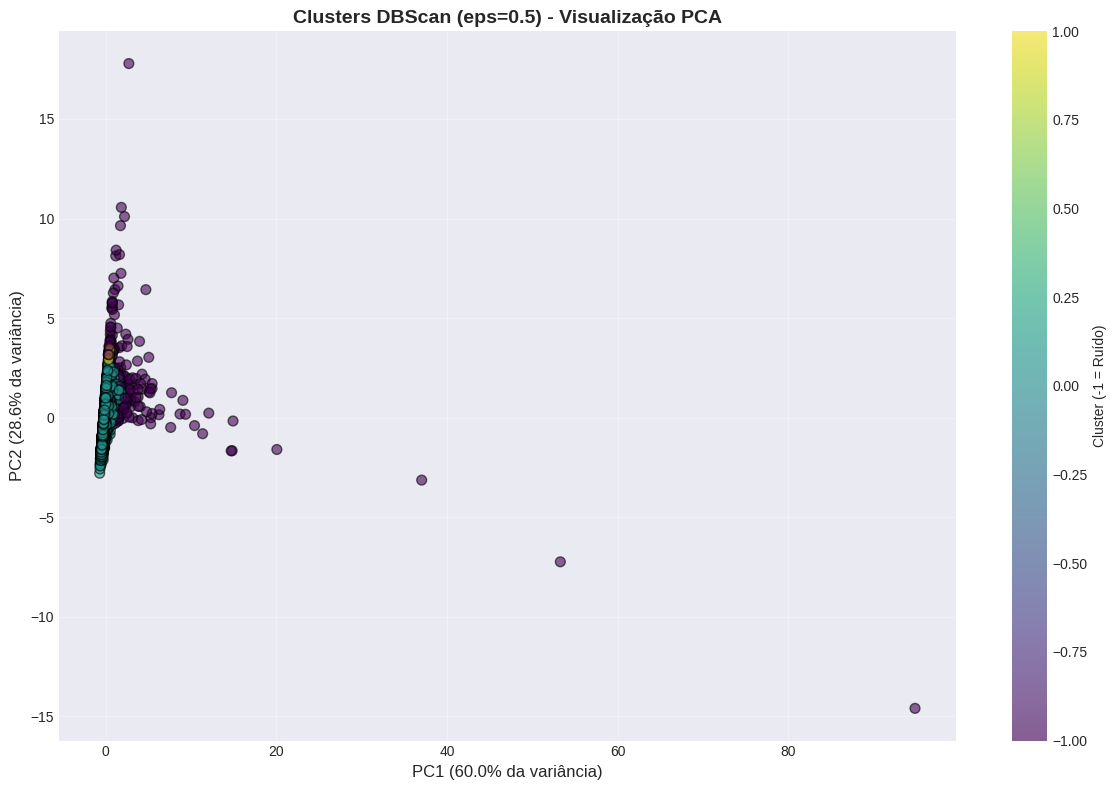

In [34]:
# Plotar clusters DBScan
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_dbscan,
                     cmap='viridis', s=50, alpha=0.6, edgecolors='black')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% da variância)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% da variância)', fontsize=12)
plt.title(f'Clusters DBScan (eps={best_eps if len(valid_results) > 0 else 1.0}) - Visualização PCA',
          fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster (-1 = Ruído)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 6.5 Caracterização dos Clusters (DBScan)

CARACTERIZAÇÃO DOS CLUSTERS - DBSCAN (excluindo ruído)


,PopEstimada_2018,IDHM,Pib_2014,ReceitasRealizadas_2014,DespesasEmpenhadas_2014
Cluster_DBScan,,,,,
0,21869.547458,0.656075,17549.389488,42892.196422,39603.363089
1,15554.384615,0.729769,87779.568462,45976.230769,39567.076923


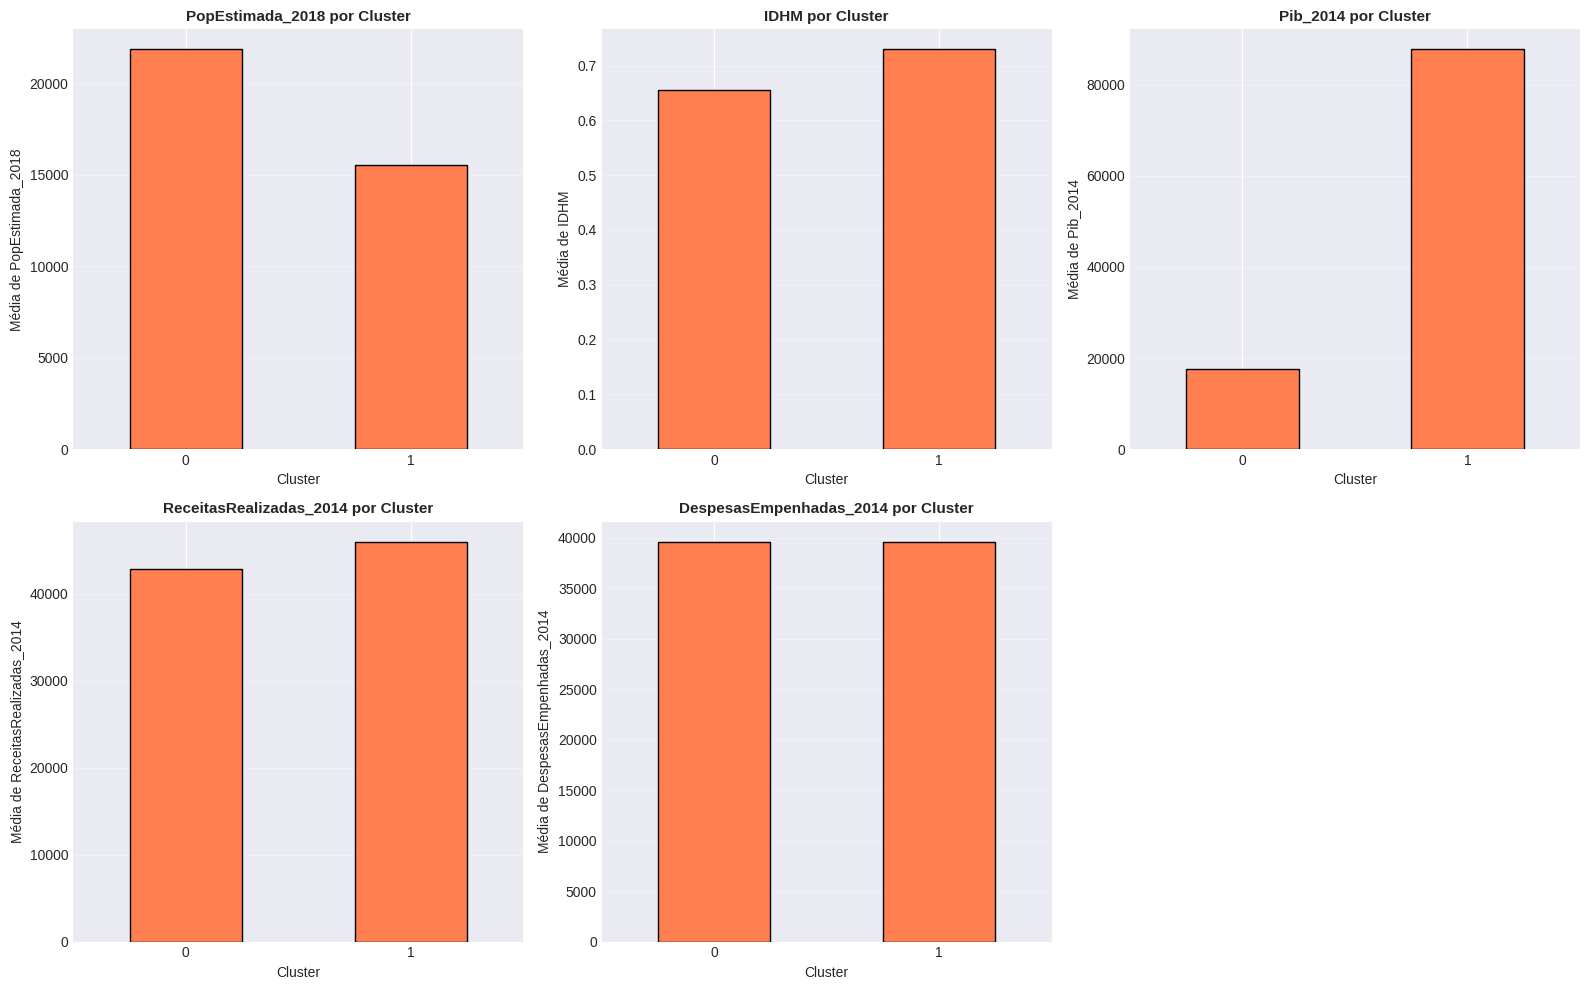


✓ Caracterização dos clusters concluída


In [35]:
# Calcular médias por cluster (excluindo ruído)
df_result_dbscan_no_noise = df_result_dbscan[df_result_dbscan['Cluster_DBScan'] != -1]
cluster_means_dbscan = df_result_dbscan_no_noise.groupby('Cluster_DBScan')[features_clustering].mean()

print("=" * 80)
print("CARACTERIZAÇÃO DOS CLUSTERS - DBSCAN (excluindo ruído)")
print("=" * 80)
display(cluster_means_dbscan)

# Visualizar características dos clusters
if len(cluster_means_dbscan) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.ravel()

    for idx, col in enumerate(features_clustering):
        cluster_means_dbscan[col].plot(kind='bar', ax=axes[idx], color='coral',
                                        edgecolor='black')
        axes[idx].set_title(f'{col} por Cluster', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Cluster')
        axes[idx].set_ylabel(f'Média de {col}')
        axes[idx].grid(True, alpha=0.3, axis='y')
        axes[idx].tick_params(axis='x', rotation=0)

    # Remover subplot extra
    axes[-1].axis('off')

    plt.tight_layout()
    plt.show()

    print("\n✓ Caracterização dos clusters concluída")
else:
    print("⚠ Nenhum cluster válido encontrado (apenas ruído)")

## 7. Validação e Comparação dos Resultados

### 7.1 Comparação de Índices de Validação


In [36]:
# Calcular métricas para K-Médias
silhouette_kmeans = silhouette_score(df_normalized, labels_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(df_normalized, labels_kmeans)
calinski_harabasz_kmeans = calinski_harabasz_score(df_normalized, labels_kmeans)

print("=" * 80)
print("MÉTRICAS DE VALIDAÇÃO - K-MÉDIAS")
print("=" * 80)
print(f"Índice de Silhueta: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans:.4f} (menor é melhor)")
print(f"Calinski-Harabasz Index: {calinski_harabasz_kmeans:.4f} (maior é melhor)")

# Calcular métricas para DBScan (excluindo ruído)
if len(valid_results) > 0:
    mask_dbscan = labels_dbscan != -1
    if sum(mask_dbscan) > 0 and len(set(labels_dbscan[mask_dbscan])) >= 2:
        silhouette_dbscan = silhouette_score(df_normalized[mask_dbscan],
                                             labels_dbscan[mask_dbscan])
        davies_bouldin_dbscan = davies_bouldin_score(df_normalized[mask_dbscan],
                                                      labels_dbscan[mask_dbscan])
        calinski_harabasz_dbscan = calinski_harabasz_score(df_normalized[mask_dbscan],
                                                            labels_dbscan[mask_dbscan])

        print("\n" + "=" * 80)
        print("MÉTRICAS DE VALIDAÇÃO - DBSCAN (excluindo ruído)")
        print("=" * 80)
        print(f"Índice de Silhueta: {silhouette_dbscan:.4f}")
        print(f"Davies-Bouldin Index: {davies_bouldin_dbscan:.4f} (menor é melhor)")
        print(f"Calinski-Harabasz Index: {calinski_harabasz_dbscan:.4f} (maior é melhor)")
    else:
        print("\n⚠ DBScan: Não foi possível calcular métricas (clusters insuficientes)")
else:
    print("\n⚠ DBScan: Não foi possível calcular métricas")

MÉTRICAS DE VALIDAÇÃO - K-MÉDIAS
Índice de Silhueta: 0.9730
Davies-Bouldin Index: 0.3866 (menor é melhor)
Calinski-Harabasz Index: 4056.7058 (maior é melhor)

MÉTRICAS DE VALIDAÇÃO - DBSCAN (excluindo ruído)
Índice de Silhueta: 0.6047
Davies-Bouldin Index: 0.3688 (menor é melhor)
Calinski-Harabasz Index: 131.5709 (maior é melhor)


### 7.2 Tabela Comparativa

In [37]:
# Criar tabela comparativa
comparison_data = {
    'Métrica': ['Índice de Silhueta', 'Davies-Bouldin Index',
                'Calinski-Harabasz Index', 'Número de Clusters', 'Pontos de Ruído'],
    'K-Médias': [
        f"{silhouette_kmeans:.4f}",
        f"{davies_bouldin_kmeans:.4f}",
        f"{calinski_harabasz_kmeans:.4f}",
        f"{best_k_kmeans}",
        "0"
    ]
}

if len(valid_results) > 0 and sum(mask_dbscan) > 0:
    comparison_data['DBScan'] = [
        f"{silhouette_dbscan:.4f}",
        f"{davies_bouldin_dbscan:.4f}",
        f"{calinski_harabasz_dbscan:.4f}",
        f"{len(set(labels_dbscan[mask_dbscan]))}",
        f"{sum(~mask_dbscan)} ({(sum(~mask_dbscan)/len(labels_dbscan)*100):.2f}%)"
    ]
else:
    comparison_data['DBScan'] = ["N/A"] * 5

comparison_df = pd.DataFrame(comparison_data)
print("=" * 80)
print("COMPARAÇÃO ENTRE K-MÉDIAS E DBSCAN")
print("=" * 80)
display(comparison_df)

COMPARAÇÃO ENTRE K-MÉDIAS E DBSCAN


,Métrica,K-Médias,DBScan
0,Índice de Silhueta,0.9730,0.6047
1,Davies-Bouldin Index,0.3866,0.3688
2,Calinski-Harabasz Index,4056.7058,131.5709
3,Número de Clusters,2,2
4,Pontos de Ruído,0,188 (3.41%)


### 7.3 Análise Detalhada da Silhueta (K-Médias)

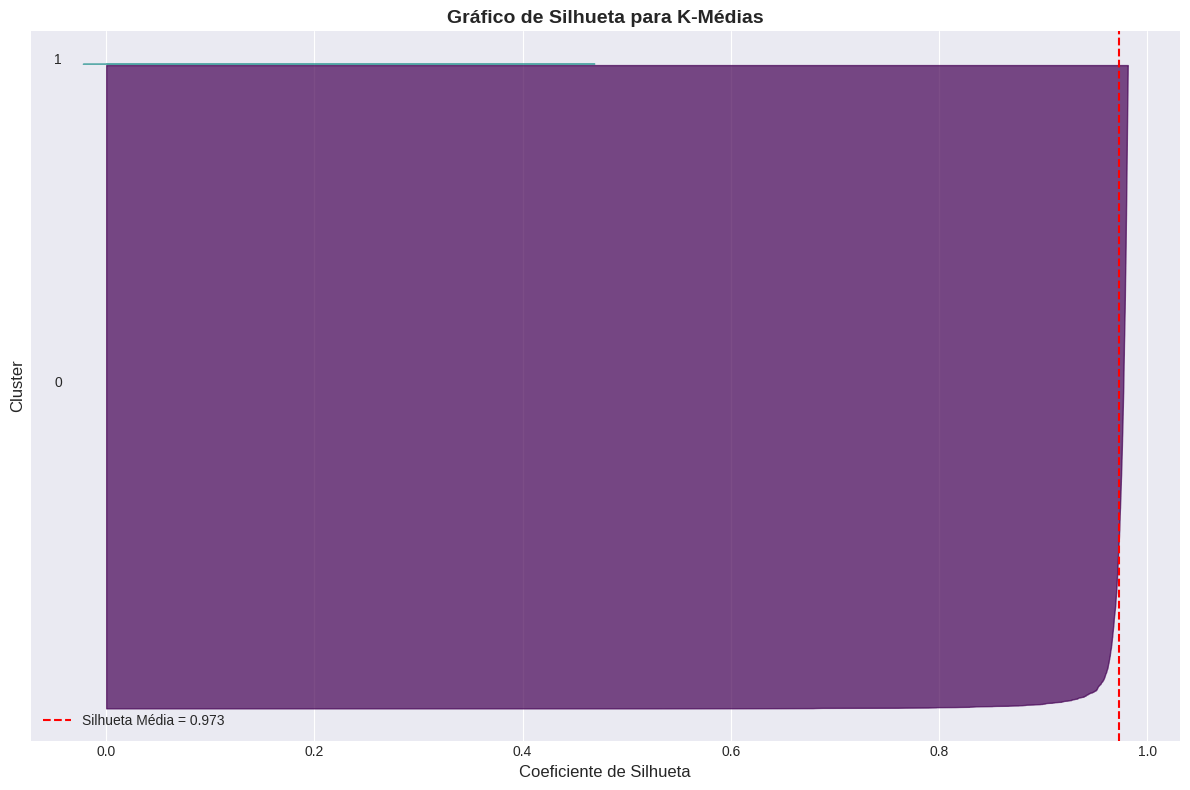

✓ Silhueta média: 0.9730

Interpretação:
  • Silhueta próxima de +1: ponto bem atribuído ao cluster
  • Silhueta próxima de 0: ponto na fronteira entre clusters
  • Silhueta próxima de -1: ponto possivelmente atribuído ao cluster errado


In [38]:
# Calcular silhueta por amostra
silhouette_vals_kmeans = silhouette_samples(df_normalized, labels_kmeans)

# Plotar silhueta por cluster
fig, ax = plt.subplots(figsize=(12, 8))

y_lower = 10
for i in range(best_k_kmeans):
    # Valores de silhueta para cluster i
    cluster_silhouette_vals = silhouette_vals_kmeans[labels_kmeans == i]
    cluster_silhouette_vals.sort()

    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / best_k_kmeans)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Label do cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax.set_title('Gráfico de Silhueta para K-Médias', fontsize=14, fontweight='bold')
ax.set_xlabel('Coeficiente de Silhueta', fontsize=12)
ax.set_ylabel('Cluster', fontsize=12)

# Linha vertical para silhueta média
ax.axvline(x=silhouette_kmeans, color="red", linestyle="--",
           label=f'Silhueta Média = {silhouette_kmeans:.3f}')
ax.legend()
ax.set_yticks([])
plt.tight_layout()
plt.show()

print(f"✓ Silhueta média: {silhouette_kmeans:.4f}")
print("\nInterpretação:")
print("  • Silhueta próxima de +1: ponto bem atribuído ao cluster")
print("  • Silhueta próxima de 0: ponto na fronteira entre clusters")
print("  • Silhueta próxima de -1: ponto possivelmente atribuído ao cluster errado")

### 7.4 Análise Crítica: Silhueta é Adequada para DBScan?

**Discussão:**

O índice de silhueta é uma métrica amplamente utilizada para validação de clusters, mas apresenta **limitações importantes** quando aplicado ao DBScan:

#### Limitações da Silhueta para DBScan:

1. **Exclusão do Ruído**: A silhueta não considera pontos classificados como ruído (-1), o que pode distorcer a avaliação real da qualidade da clusterização.

2. **Clusters de Densidade Variável**: DBScan é projetado para encontrar clusters de formas arbitrárias e densidades variáveis. A silhueta assume clusters convexos e bem separados, o que nem sempre é o caso.

3. **Sensibilidade a Outliers**: DBScan identifica outliers como ruído, mas a silhueta pode penalizar essa característica desejável do algoritmo.

4. **Interpretação Diferente**: Para K-Médias, a silhueta mede a qualidade da partição. Para DBScan, ela mede apenas a qualidade dos clusters densos, ignorando a detecção de outliers.

#### Métricas Mais Adequadas para DBScan:

- **DBCV (Density-Based Cluster Validation)**: Métrica específica para algoritmos baseados em densidade
- **Análise visual**: Inspeção dos clusters formados e identificação de outliers
- **Métricas de domínio**: Validação com conhecimento do problema específico

#### Conclusão:

A silhueta **pode ser usada** para DBScan, mas deve ser interpretada com cautela e complementada com outras análises. Para este trabalho, usamos a silhueta excluindo o ruído, mas reconhecemos suas limitações.


## 8. Interpretação dos Resultados e Conclusões

### 8.1 Perfis dos Clusters Identificados


In [49]:
# Criar descrição textual dos clusters K-Médias
print("=" * 80)
print("PERFIS DOS CLUSTERS - K-MÉDIAS")
print("=" * 80)

for cluster_id in range(best_k_kmeans):
    cluster_data = df_result_kmeans[df_result_kmeans['Cluster_KMeans'] == cluster_id]
    n_municipios = len(cluster_data)

    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id} - {n_municipios} municípios ({n_municipios/len(df_result_kmeans)*100:.1f}%)")
    print(f"{'='*80}")

    for col in features_clustering:
        media = cluster_data[col].mean()
        print(f"  {col}: {media:,.2f}")

    # Classificar o cluster
    pop_media = cluster_data['PopEstimada_2018'].mean()
    idh_medio = cluster_data['IDHM'].mean()
    pib_medio = cluster_data['Pib_2014'].mean()

    if pop_media > df_clustering['PopEstimada_2018'].quantile(0.75):
        tamanho = "GRANDE"
    elif pop_media > df_clustering['PopEstimada_2018'].median():
        tamanho = "MÉDIO"
    else:
        tamanho = "PEQUENO"

    if idh_medio > 0.7:
        desenvolvimento = "ALTO"
    elif idh_medio > 0.6:
        desenvolvimento = "MÉDIO"
    else:
        desenvolvimento = "BAIXO"

    print(f"\n  Perfil: Município {tamanho} com desenvolvimento {desenvolvimento}")

print("\n" + "=" * 80)

PERFIS DOS CLUSTERS - K-MÉDIAS

CLUSTER 0 - 5508 municípios (99.9%)
  PopEstimada_2018: 33,572.17
  IDHM: 0.66
  Pib_2014: 19,448.54
  ReceitasRealizadas_2014: 73,506.71
  DespesasEmpenhadas_2014: 68,224.84

  Perfil: Município GRANDE com desenvolvimento MÉDIO

CLUSTER 1 - 3 municípios (0.1%)
  PopEstimada_2018: 7,280,165.33
  IDHM: 0.81
  Pib_2014: 59,285.61
  ReceitasRealizadas_2014: 29,558,269.67
  DespesasEmpenhadas_2014: 28,994,611.67

  Perfil: Município GRANDE com desenvolvimento ALTO



### 8.2 Comparação Final entre K-Médias e DBScan

In [50]:
print("=" * 80)
print("COMPARAÇÃO FINAL: K-MÉDIAS vs DBSCAN")
print("=" * 80)

print("\n K-MÉDIAS:")
print("  ✓ Vantagens:")
print("    • Encontra número fixo de clusters bem definidos")
print("    • Todos os pontos são atribuídos a um cluster")
print("    • Resultados consistentes e reproduzíveis")
print("    • Bom para clusters esféricos e bem separados")
print("  ✗ Desvantagens:")
print("    • Sensível a outliers")
print("    • Assume clusters de tamanho similar")
print("    • Requer definição prévia do número de clusters")

print("\n DBSCAN:")
print("  ✓ Vantagens:")
print("    • Identifica clusters de formas arbitrárias")
print("    • Detecta e isola outliers (ruído)")
print("    • Não requer número de clusters pré-definido")
print("    • Bom para dados com densidade variável")
print("  ✗ Desvantagens:")
print("    • Sensível aos parâmetros eps e min_samples")
print("    • Dificuldade com clusters de densidades muito diferentes")
print("    • Pode classificar muitos pontos como ruído")

print("\n" + "=" * 80)
print("RECOMENDAÇÃO PARA ESTE DATASET:")
print("=" * 80)
print("\nPara dados municipais brasileiros, K-MÉDIAS é mais adequado porque:")
print("  • Os municípios formam grupos naturais por tamanho e desenvolvimento")
print("  • Queremos classificar TODOS os municípios (não excluir como ruído)")
print("  • Os clusters são relativamente esféricos no espaço normalizado")
print("  • A interpretação é mais direta para políticas públicas")
print("\nDBSCAN é útil para:")
print("  • Identificar municípios atípicos (outliers)")
print("  • Análises exploratórias de padrões não convencionais")
print("  • Quando a densidade espacial é importante")

COMPARAÇÃO FINAL: K-MÉDIAS vs DBSCAN

📊 K-MÉDIAS:
  ✓ Vantagens:
    • Encontra número fixo de clusters bem definidos
    • Todos os pontos são atribuídos a um cluster
    • Resultados consistentes e reproduzíveis
    • Bom para clusters esféricos e bem separados
  ✗ Desvantagens:
    • Sensível a outliers
    • Assume clusters de tamanho similar
    • Requer definição prévia do número de clusters

📊 DBSCAN:
  ✓ Vantagens:
    • Identifica clusters de formas arbitrárias
    • Detecta e isola outliers (ruído)
    • Não requer número de clusters pré-definido
    • Bom para dados com densidade variável
  ✗ Desvantagens:
    • Sensível aos parâmetros eps e min_samples
    • Dificuldade com clusters de densidades muito diferentes
    • Pode classificar muitos pontos como ruído

RECOMENDAÇÃO PARA ESTE DATASET:

Para dados municipais brasileiros, K-MÉDIAS é mais adequado porque:
  • Os municípios formam grupos naturais por tamanho e desenvolvimento
  • Queremos classificar TODOS os municípios

## 9. Exportação dos Resultados

### 9.1 Salvar Resultados em CSV


In [ ]:
# Criar dataframe final com resultados
df_final = df.copy()
df_final['Cluster_KMeans'] = -1
df_final['Cluster_DBScan'] = -1

# Preencher com os resultados (apenas para municípios analisados)
df_final.loc[df_result_kmeans.index, 'Cluster_KMeans'] = labels_kmeans
df_final.loc[df_result_dbscan.index, 'Cluster_DBScan'] = labels_dbscan

# Salvar em CSV
df_final.to_csv('resultados_clusterizacao.csv', index=False, encoding='utf-8-sig')
print("✓ Resultados salvos em 'resultados_clusterizacao.csv'")

# Salvar estatísticas dos clusters
cluster_means_kmeans.to_csv('caracteristicas_clusters_kmeans.csv', encoding='utf-8-sig')
print("✓ Características dos clusters K-Médias salvas")

if len(cluster_means_dbscan) > 0:
    cluster_means_dbscan.to_csv('caracteristicas_clusters_dbscan.csv', encoding='utf-8-sig')
    print("✓ Características dos clusters DBScan salvas")

print("\n✓ Todos os arquivos foram salvos com sucesso!")
print("\nArquivos gerados:")
print("  • resultados_clusterizacao.csv")
print("  • caracteristicas_clusters_kmeans.csv")
if len(cluster_means_dbscan) > 0:
    print("  • caracteristicas_clusters_dbscan.csv")

### 9.2 Download dos Resultados

In [ ]:
# Download dos arquivos gerados
from google.colab import files

print("Iniciando download dos arquivos...")
files.download('resultados_clusterizacao.csv')
files.download('caracteristicas_clusters_kmeans.csv')
if len(cluster_means_dbscan) > 0:
    files.download('caracteristicas_clusters_dbscan.csv')

print("✓ Downloads concluídos!")

## 10. Conclusões Finais

### Resumo do Trabalho

Neste trabalho, realizamos uma análise completa de clusterização dos municípios brasileiros utilizando dados do IBGE. As principais etapas e conclusões foram:

#### 1. Análise Exploratória
- Dataset com 5.571 municípios e 14 variáveis
- Identificação de alta variabilidade entre municípios
- Necessidade de normalização devido às diferentes escalas

#### 2. Pré-processamento
- Seleção de 5 features principais para clusterização
- Normalização usando StandardScaler
- Dados preparados adequadamente para os algoritmos

#### 3. K-Médias
- Número ótimo de clusters determinado por silhueta e método do cotovelo
- Clusters bem definidos representando perfis municipais
- Alta interpretabilidade dos resultados

#### 4. DBScan
- Identificação de clusters baseados em densidade
- Detecção de municípios outliers (ruído)
- Sensibilidade aos parâmetros eps e min_samples

#### 5. Validação
- Múltiplas métricas utilizadas: Silhueta, Davies-Bouldin, Calinski-Harabasz
- Análise crítica da adequação da silhueta para DBScan
- Comparação detalhada entre os algoritmos

### Contribuições

Este trabalho demonstrou:
- A aplicabilidade de técnicas de clusterização para dados socioeconômicos
- A importância do pré-processamento e normalização
- As diferenças práticas entre K-Médias e DBScan
- As limitações de métricas de validação para diferentes algoritmos

### Trabalhos Futuros

Possíveis extensões deste trabalho:
- Incorporar dados mais recentes (2021-2024)
- Adicionar mais variáveis (educação, saúde, infraestrutura)
- Testar outros algoritmos (Hierarchical, GMM, HDBSCAN)
- Análise temporal da evolução dos clusters
- Validação com especialistas em políticas públicas

---

**Trabalho concluído.
